# M062 Reports

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append("../../")

import pyaldata as pyal
import pandas as pd
import numpy as np

from tools.reports.report_initial import run_initial_report

## 21st of March 14:00h

In [146]:
# Files 
session = 'M062_2025_03_21_14_00'
data_dir = f"/data/bnd-data/raw/M062/{session}"
fname0 = os.path.join(data_dir, f"{session}_pyaldata_0.mat")
fname1 = os.path.join(data_dir, f"{session}_pyaldata_1.mat")
fname2 = os.path.join(data_dir, f"{session}_pyaldata_2.mat")


# Load files
df0 = pyal.mat2dataframe(fname0, shift_idx_fields=False)
df1 = pyal.mat2dataframe(fname1, shift_idx_fields=False)
df2 = pyal.mat2dataframe(fname2, shift_idx_fields=False)

df = pd.concat([df0, df1, df2], ignore_index=True)

del df0
del df1
del df2

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
field values_Sol_direction could not be converted t

### Report

In [ ]:
run_initial_report(df, areas=["MOp", "SSp", "CP", "VAL"])

### Mean firing

In [3]:
from tools.viz import mean_firing as firing
import matplotlib.pyplot as plt
from tools.params import Params

In [ ]:
from tools.dsp.preprocessing import preprocess

    df_ = preprocess(df, only_trials=False, repair_time_varying_fields=['MotSen1_X', 'MotSen1_Y'])

Repairing columns ['MotSen1_X', 'MotSen1_Y']
Extending index to 47999 in trial: free and id: 707, inserting NaN.
Extending index to 47989 in trial: free and id: 707, inserting NaN.
Extending index to 47990 in trial: free and id: 707, inserting NaN.
Extending index to 47991 in trial: free and id: 707, inserting NaN.
Extending index to 47992 in trial: free and id: 707, inserting NaN.
Extending index to 47993 in trial: free and id: 707, inserting NaN.
Extending index to 47994 in trial: free and id: 707, inserting NaN.
Extending index to 47995 in trial: free and id: 707, inserting NaN.
Extending index to 47996 in trial: free and id: 707, inserting NaN.
Extending index to 47997 in trial: free and id: 707, inserting NaN.
Extending index to 47998 in trial: free and id: 707, inserting NaN.
Extending index to 47999 in trial: free and id: 707, inserting NaN.


/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assum

Combined every 3 bins
Resulting SSp_spikes ephys data shape is (NxT): (66, 16000)
Resulting all_spikes ephys data shape is (NxT): (23, 16000)
Resulting VAL_spikes ephys data shape is (NxT): (122, 16000)
Resulting CP_spikes ephys data shape is (NxT): (280, 16000)
Resulting MOp_spikes ephys data shape is (NxT): (179, 16000)


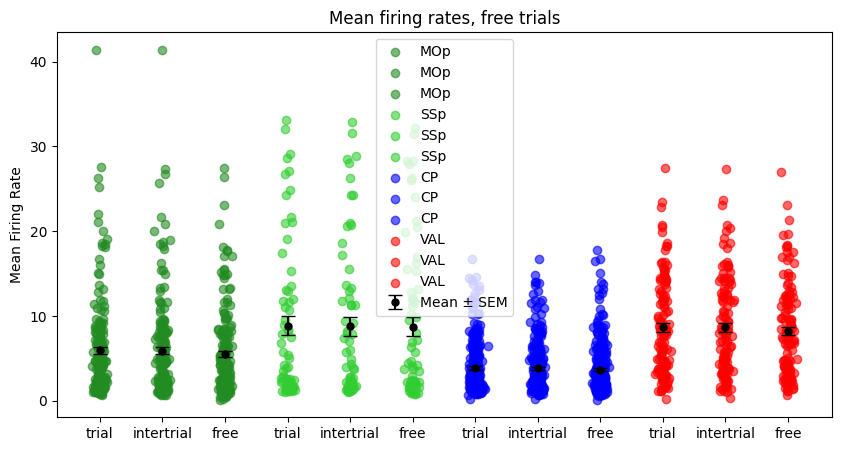

In [34]:
areas=["MOp", "SSp", "CP", "VAL"]
fig, ax = plt.subplots(figsize=(10, 5))
trial_types = ['trial', 'intertrial','free']
firing.compare_mean_firing(ax, df_, areas=areas, trial_types=trial_types)


In [ ]:

def moving_window_mean(data, window_size):
    means = []
    time_bins = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size, :]
        window_mean = np.mean(window, axis=0)
        means.append(window_mean)
        time_bins.append(i + window_size)
    return np.array(means), np.array(time_bins)



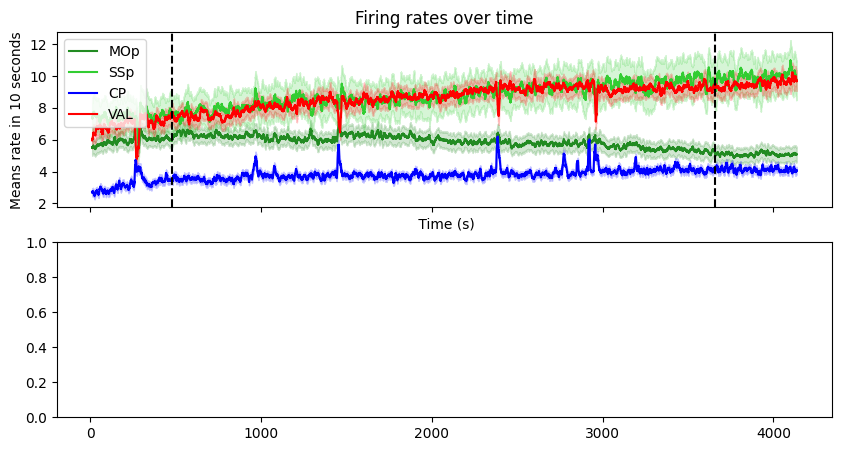

In [67]:
from scipy import stats
from tools import params
from tools.viz.utilityTools import shaded_errorbar

window = 10  # in seconds

fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex='all')


for area in areas:
    all_rates = np.concatenate(df_[f"{area}_rates"].values, axis=0)
    means, time_bins = moving_window_mean(all_rates, int(window / Params.BIN_SIZE))  # 3 second windows
    shaded_errorbar(ax[0], x=time_bins * Params.BIN_SIZE, y=means, errorStat=stats.sem, 
                    color=getattr(params.colors, area, "k"),
                    label=area
                    )


ax[0].set_ylabel(f'Means rate in {window} seconds')
ax[0].set_xlabel(f' Time (s)')
ax[0].axvline(x=480, color="k", linestyle="--")
ax[0].axvline(x=3660, color="k", linestyle="--")
ax[0].set_title('Firing rates over time')
ax[0].legend()


In [141]:
import pandas as pd
import numpy as np

# Define the function
def insert_nans_and_extend_to_spikes_inplace(df, idx_row, value_row, spikes_row):
    new_rows = []

    for i, row in df.iterrows():
        idx_seq = list(row[idx_row])
        val_seq = list(row[value_row])
        spike_len = row[spikes_row].shape[0]

        # Fill missing indices in the existing idx sequence
        full_idx = list(range(idx_seq[0], idx_seq[-1] + 1))
        full_vals = []

        idx_pointer = 0
        for j in full_idx:
            if idx_pointer < len(idx_seq) and idx_seq[idx_pointer] == j:
                full_vals.append(val_seq[idx_pointer])
                idx_pointer += 1
            else:
                full_vals.append(np.nan)
                print(f"Missing index {j} in trial: {df.trial_name[i]} and id: {df.trial_id[i]}, inserting NaN.")

        # Extend idx to match spikes length
        if full_idx[-1] + 1 < spike_len:
            for j in range(full_idx[-1] + 1, spike_len):
                full_idx.append(j)
                full_vals.append(np.nan)
                print(f"Extending index to {j} in trial: {df.trial_name[i]} and id: {df.trial_id[i]}, inserting NaN.")

        # Update the DataFrame in-place
        df.at[i, idx_row] = np.array(full_idx)
        df.at[i, value_row] = np.array(full_vals)

    return pd.DataFrame(new_rows)


In [123]:
# Create toy data
data = {
    'trial_name': ['trial1', 'trial2'],
    'trial_id': [101, 102],
    'idx_seq': [[0, 1, 3], [0, 2, 3]],
    'values_seq': [[10, 20, 40], [15, 35, 45]],
    'spikes': [np.zeros((6,)), np.zeros((5,))],  # shape[0] will be 6 and 5
}

tmp_df = pd.DataFrame(data)

# Apply the function
# new_df = insert_nans_and_extend_to_spikes(df, 'idx_seq', 'values_seq', 'spikes')

# print("\nResulting DataFrame:")
# print(new_df)
tmp_df.head()

,trial_name,trial_id,idx_seq,values_seq,spikes
0,trial1,101,"[0, 1, 3]","[10, 20, 40]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,trial2,102,"[0, 2, 3]","[15, 35, 45]","[0.0, 0.0, 0.0, 0.0, 0.0]"


In [142]:
insert_nans_and_extend_to_spikes_inplace(df, 'idx_MotSen1_Y', 'values_MotSen1_Y', 'MOp_spikes')
insert_nans_and_extend_to_spikes_inplace(df, 'idx_MotSen1_X', 'values_MotSen1_X', 'MOp_spikes')


Extending index to 47989 in trial: free and id: 707, inserting NaN.
Extending index to 47990 in trial: free and id: 707, inserting NaN.
Extending index to 47991 in trial: free and id: 707, inserting NaN.
Extending index to 47992 in trial: free and id: 707, inserting NaN.
Extending index to 47993 in trial: free and id: 707, inserting NaN.
Extending index to 47994 in trial: free and id: 707, inserting NaN.
Extending index to 47995 in trial: free and id: 707, inserting NaN.
Extending index to 47996 in trial: free and id: 707, inserting NaN.
Extending index to 47997 in trial: free and id: 707, inserting NaN.
Extending index to 47998 in trial: free and id: 707, inserting NaN.
Extending index to 47999 in trial: free and id: 707, inserting NaN.
Extending index to 47999 in trial: free and id: 707, inserting NaN.


""


In [144]:
df.values_MotSen1_X[707]

array([10., 12., 11., ...,  6.,  6., nan])

In [145]:
df__ = preprocess(df, only_trials=False)

/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assum

Combined every 3 bins
Resulting SSp_spikes ephys data shape is (NxT): (66, 16000)
Resulting all_spikes ephys data shape is (NxT): (23, 16000)
Resulting VAL_spikes ephys data shape is (NxT): (122, 16000)
Resulting CP_spikes ephys data shape is (NxT): (280, 16000)
Resulting MOp_spikes ephys data shape is (NxT): (179, 16000)
